# Analysing Amazon Sales Data

# Introduction

About the project

Amazon Sales Data Analysis (ASDA)


In this notebook, we're going to use Python and perform some exploratory data analysis (EDA) along with some machine learning techniques. I've tried to make the notebook beginner friendly, so if you are new to the whole world of data analysis, data science and machine learning, you can enjoy it too.

About the Data

I've used a Amazon Sales dataset for this notebook. Originially, the dataset is provided by the UNIFIED MONITOR PRIVATE LIMITED and contains actual e-commerce transactions occurring between 2010 and 2017 for a UK-based online retailer. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# Getting Started

# import python libraries

# 1. NumPy
for linear algebra
# 2. Pandas
for tabular data manipulation & processing, CSV file I/O
# 3. Matplotlib
for data visualization (scatterplots, bar charts, histograms, etc.)
# 4. Seaborn
for data visualization and statistical plotting (built on top of Matplotlib)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import dataset

As mentioned in the introduction, data is pooled from a Google colab Amazon sales dataset.

Now, we wil use pandas for load the dataset

In [2]:
# Load the dataset

file_path = '/content/sample_data/Amazon Sales data.csv'

In [3]:
df = pd.read_csv(file_path)

In [4]:

# Display the first few rows

df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
# Display the data types

df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [6]:
# Displaying No.of rows and No.of columns

df.shape

(100, 14)

# Data Cleaning and Transformation

In [7]:
# Convert 'Order Date' to datetime

df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Order Date']

0    2010-05-28
1    2012-08-22
2    2014-05-02
3    2014-06-20
4    2013-02-01
        ...    
95   2011-07-26
96   2011-11-11
97   2016-06-01
98   2015-07-30
99   2012-02-10
Name: Order Date, Length: 100, dtype: datetime64[ns]

In [8]:
# Drop rows with NaT in 'Order Date'

df = df.dropna(subset=['Order Date'])
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


# Extract year, month, and week from 'Order Date'

In [9]:
df['year'] = df['Order Date'].dt.year
df['year']

0     2010
1     2012
2     2014
3     2014
4     2013
      ... 
95    2011
96    2011
97    2016
98    2015
99    2012
Name: year, Length: 100, dtype: int32

In [10]:
df['month'] = df['Order Date'].dt.month
df['month']

0      5
1      8
2      5
3      6
4      2
      ..
95     7
96    11
97     6
98     7
99     2
Name: month, Length: 100, dtype: int32

In [11]:
df['weekofyear'] = df['Order Date'].dt.isocalendar().week
df['weekofyear']

0     21
1     34
2     18
3     25
4      5
      ..
95    30
96    45
97    22
98    31
99     6
Name: weekofyear, Length: 100, dtype: UInt32

In [12]:
# Fill missing values in other columns

df = df.fillna(0)
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,year,month,weekofyear
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,21
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,34
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,18
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,25
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,5


In [13]:
# Display the cleaned data

df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,year,month,weekofyear
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,21
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,34
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,18
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,25
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,5


In [14]:

# Display the cleaned data

df.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date                 object
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
year                       int32
month                      int32
weekofyear                UInt32
dtype: object

# Data Aggregation for Trends

We will aggregate the data to analyze sales trends.

In [15]:
monthly_sales = df.groupby(['year','month'])['Units Sold'].sum().reset_index()
monthly_sales.head()

,year,month,Units Sold
0,2010,2,9503
1,2010,5,15747
2,2010,6,9905
3,2010,10,14403
4,2010,11,7910


In [16]:
yearly_sales = df.groupby('year')['Units Sold'].sum().reset_index()
yearly_sales.head()

,year,Units Sold
0,2010,61571
1,2011,54768
2,2012,97967
3,2013,64663
4,2014,92040


In [17]:
weekly_sales = df.groupby(['year','weekofyear'])['Units Sold'].sum().reset_index()
weekly_sales.head()

,year,weekofyear,Units Sold
0,2010,5,9503
1,2010,18,5822
2,2010,21,9925
3,2010,26,9905
4,2010,42,8287


# Visualisation and insights

Now, we will visualize the trends using Matplotlib and Seaborn.

In [18]:
# Set Seaborn style
sns.set(style="whitegrid")

In [19]:
df.describe()

,Order Date,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,year,month,weekofyear
count,100,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000,100.0
mean,2013-09-16 14:09:36,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05,2013.230000,6.260000,25.52
min,2010-02-02 00:00:00,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03,2010.000000,1.000000,1.0
25%,2012-02-14 12:00:00,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05,2012.000000,4.000000,13.75
50%,2013-07-12 12:00:00,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05,2013.000000,6.000000,25.0
75%,2015-04-07 00:00:00,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05,2015.000000,9.250000,38.5
max,2017-05-22 00:00:00,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06,2017.000000,12.000000,52.0
std,NaN,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05,2.088231,3.353334,14.887104


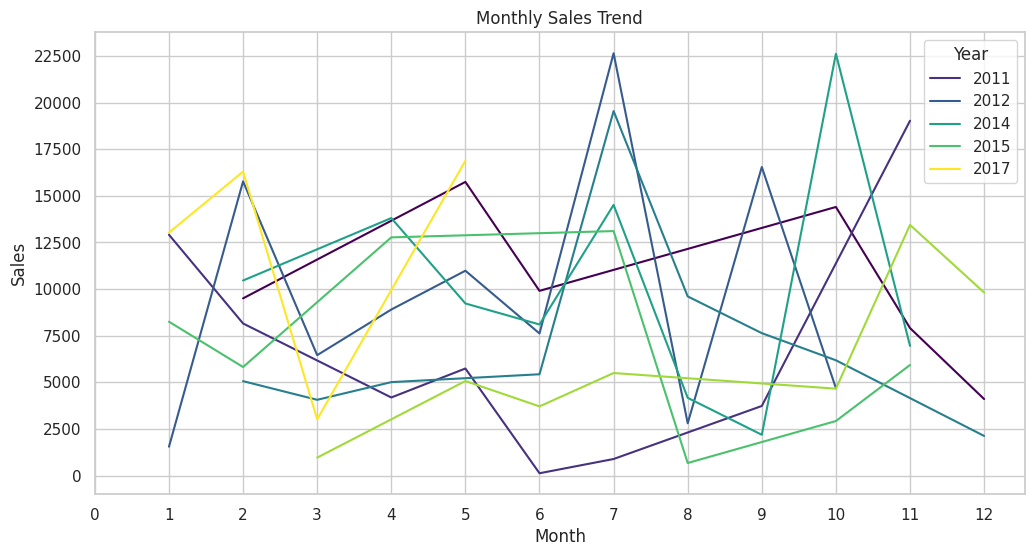

In [20]:
# Monthly Sales Trend Visualization
plt.figure(figsize=(12, 6))

sns.lineplot(data=monthly_sales, x='month', y='Units Sold', hue='year', palette='viridis')

plt.xticks(np.arange(0,13,1))
plt.yticks(np.arange(0,25000,2500))

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')

plt.show()

<ipython-input-21-ab02e668867e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_sales, x='year', y='Units Sold', palette='viridis')


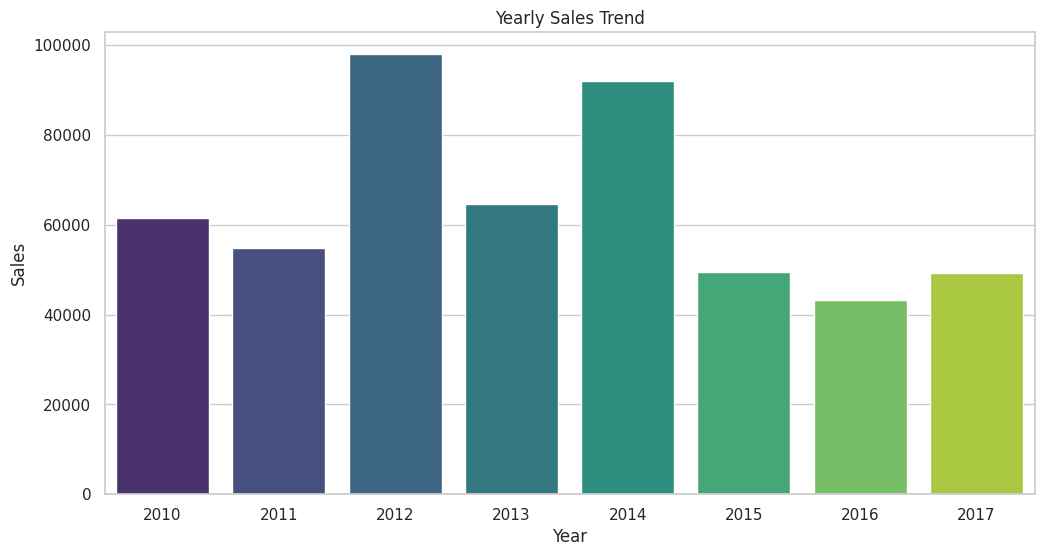

In [21]:
# Yearly Sales Trend Visualization
plt.figure(figsize=(12, 6))

sns.barplot(data=yearly_sales, x='year', y='Units Sold', palette='viridis')

plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')

plt.show()

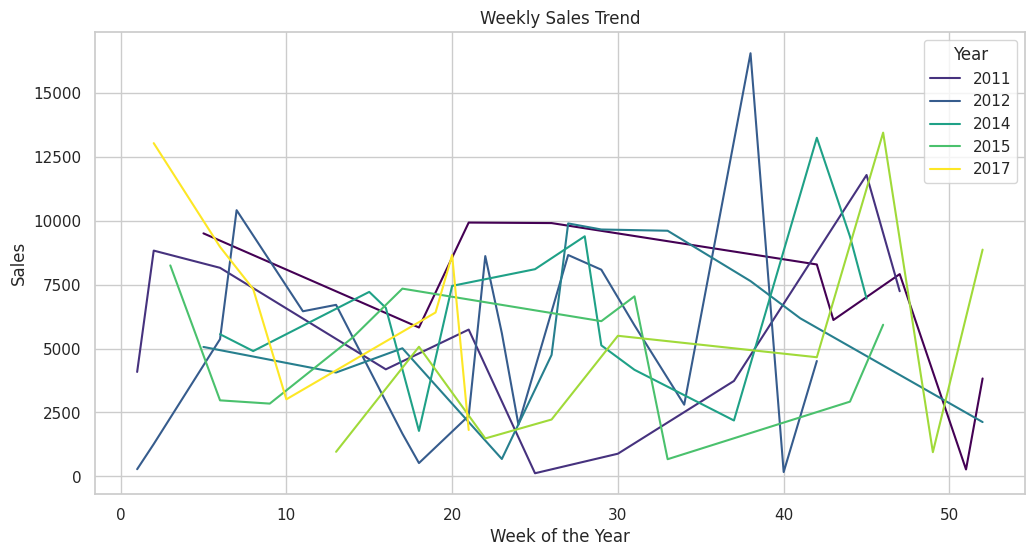

In [22]:
# Weekly Sales Trend Visualization
plt.figure(figsize=(12, 6))

sns.lineplot(data=weekly_sales, x='weekofyear', y='Units Sold', hue='year', palette='viridis')

plt.title('Weekly Sales Trend')
plt.xlabel('Week of the Year')
plt.ylabel('Sales')
plt.legend(title='Year')

plt.show()

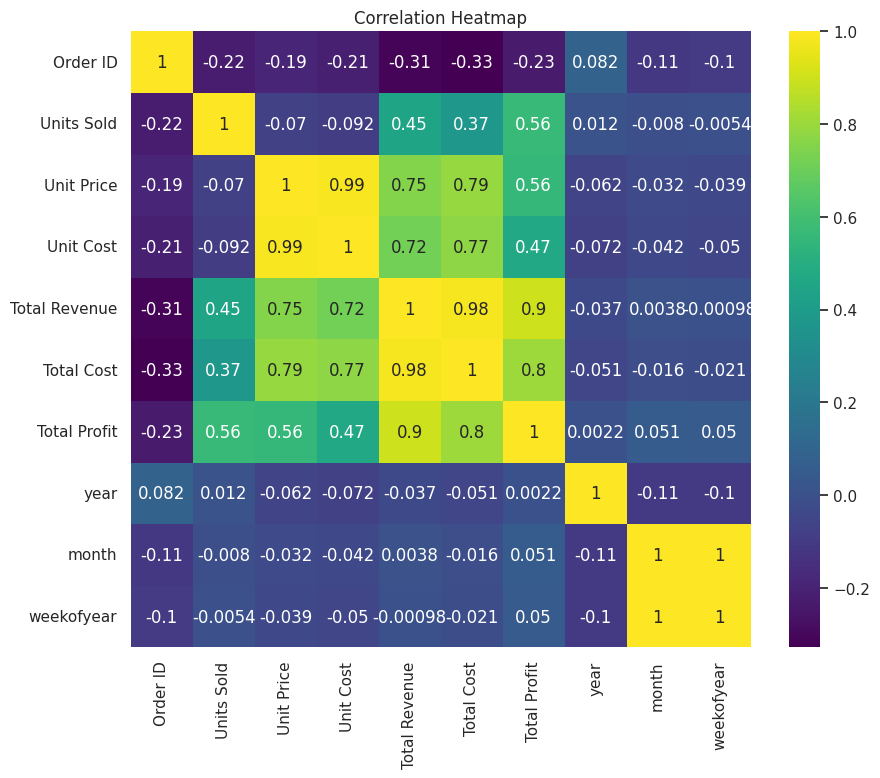

In [23]:
# Select only numerical columns for the correlation heatmap
numeric_df = df.select_dtypes(include=['number'])

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

# Key Metrics and Relationships

We will calculate key metrics and analyze relationships between variables.

In [24]:
total_sales = df['Units Sold'].sum()
print(f"Total Sales: {total_sales}")

Total Sales: 512871


In [25]:
average_sales_per_order = df['Units Sold'].mean()
print(f"Average Sales per Order: {average_sales_per_order}")

Average Sales per Order: 5128.71


In [26]:
total_orders = df['Order ID'].nunique()
print(f"Total Orders: {total_orders}")

Total Orders: 100


In [27]:
average_order_value = total_sales / total_orders
print(f"Average Order Value: {average_order_value}")

Average Order Value: 5128.71


In [28]:
# Correlation Analysis
correlations = numeric_df.corr()['Units Sold'].sort_values(ascending=False)
print("Correlations with Sales:")
print(correlations)

Correlations with Sales:
Units Sold       1.000000
Total Profit     0.564550
Total Revenue    0.447784
Total Cost       0.374746
year             0.012455
weekofyear      -0.005381
month           -0.007995
Unit Price      -0.070486
Unit Cost       -0.092232
Order ID        -0.222907
Name: Units Sold, dtype: float64


# Conclusion

By following these steps, This advanced analysis provides a comprehensive view of Amazon sales data, uncovering trends, key metrics, and relationships between various factors. Combining Python's powerful data manipulation and analysis capabilities with advanced visualization features results in a robust analytical framework.

By leveraging advanced data analysis techniques, Python libraries, visualization capabilities, this approach delivers actionable insights for improving sales management and strategic decision-making.

# *** Thank Q***
For your valuable time.